# To predict the salary of an Employee

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import warnings

In [2]:
df=pd.read_csv("C:/Users/HP/Downloads/Salary_Data1.csv")

In [3]:
df.head()

,Experience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Experience  30 non-null     float64
 1   Salary      30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [5]:
df.shape

(30, 2)

In [6]:
df.describe()

,Experience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
df.isnull().sum() # there are no null values

Experience    0
Salary        0
dtype: int64

In [8]:
df.skew() #distribution is normal

Experience    0.37956
Salary        0.35412
dtype: float64

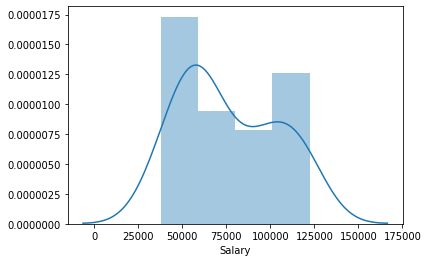

In [9]:
#data visualization
sns.distplot(df.Salary)

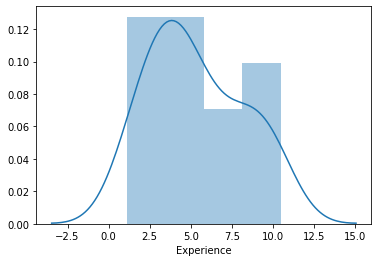

In [10]:
sns.distplot(df.Experience)

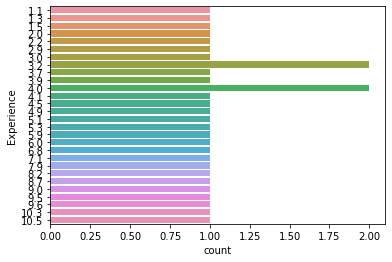

In [11]:
sns.countplot(y='Experience',data=df)

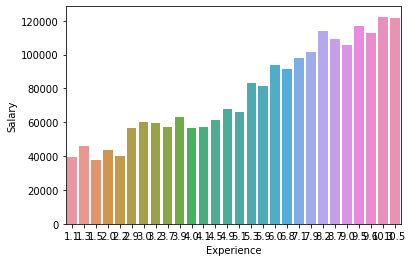

In [12]:
sns.barplot(x='Experience',y='Salary',data=df,ci=None)

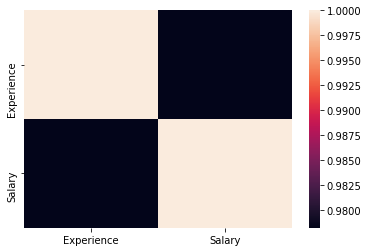

In [13]:
#finding correlation
sns.heatmap(df.corr())

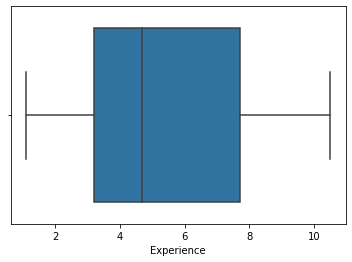

In [14]:
#checking outliers
sns.boxplot(df['Experience'])

In [15]:
#spliting x and y for train test
x=df.iloc[:,0:1].values

In [16]:
y=df.iloc[:,1:2].values

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [18]:
lg=LinearRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
y_pred   # here predictions are not too bad

array([[ 40835.10590871],
       [123079.39940819],
       [ 65134.55626083],
       [ 63265.36777221],
       [115602.64545369],
       [108125.8914992 ],
       [116537.23969801],
       [ 64199.96201652],
       [ 76349.68719258],
       [100649.1375447 ]])

In [19]:
print('r2 score:',r2_score(y_test,y_pred))


r2 score: 0.9749154407708353


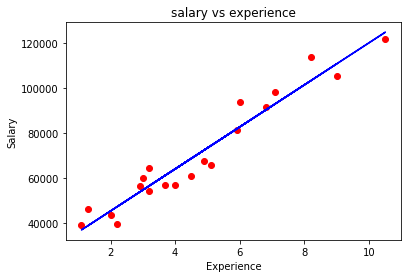

In [20]:
#visualization on train results
plt.scatter(x_train,y_train,color='r')
plt.plot(x_train,lg.predict(x_train),color='b')
plt.title('salary vs experience')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

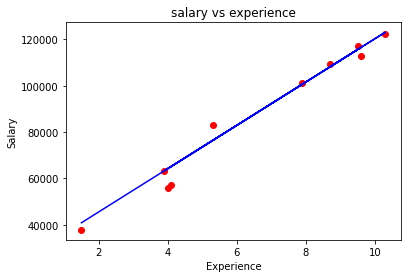

In [21]:
#visualization on test results
plt.scatter(x_test,y_test,color='r')
plt.plot(x_test,lg.predict(x_test),color='b')
plt.title('salary vs experience')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [22]:
from sklearn.model_selection import cross_val_score
lgscores=cross_val_score(lg,x,y,cv=3)
print(lgscores)
print(lgscores.mean(),lgscores.std())

[0.42772573 0.63293326 0.71542639]
0.5920284587713642 0.12096230568610508


In [23]:
#Make new predictions
new_salary=lg.predict([[15]])
print('The predicted salary of a person with 15 years of experience is',new_salary)

The predicted salary of a person with 15 years of experience is [[167005.32889087]]


In [26]:
#lets save a model 
from sklearn.externals import joblib
joblib.dump(lg,'salary.pkl')

['salary.pkl']